In [101]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

In [14]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [15]:
print("The dimensionality of the training set",train.shape)
print("The dimensionality of the testing set",test.shape)

The dimensionality of the training set (891, 12)
The dimensionality of the testing set (418, 11)


In [16]:
print("The first ten entries in the training set are:")
train.head(10)

The first ten entries in the training set are:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
print("The first ten entries in the test set are:")
test.head(10)

The first ten entries in the test set are:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [18]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
complete = pd.concat([train.drop('Survived',axis=1),test])

In [29]:
complete.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
182,1074,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S
471,472,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
266,267,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
832,833,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C
661,662,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
667,668,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
843,844,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
221,1113,3,"Reynolds, Mr. Harold J",male,21.0,0,0,342684,8.0500,NaN,S
45,46,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S


In [42]:
#one error in titanic notebook - i dont know whose might be anisotropic
#missing values in training set
print("The coloumns containing the missed values\n")
print(train.isnull().sum())
print("\nThe data type and the number of non NaN values in the column\n")
print(train.info())

The coloumns containing the missed values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The data type and the number of non NaN values in the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [43]:
#by looking at this we can see that the embarked can be filled with most repetitve value of embarkment.
#check the missing values in testing set
print("The coloumns containing the missed values in test set n")
print(test.isnull().sum())
print("\nThe data type and the number of non NaN values in the column in test set\n")
print(test.info())

The coloumns containing the missed values in test set n
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The data type and the number of non NaN values in the column in test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [52]:
survived=train[train["Survived"] == 1]
non_survived = train[train["Survived"] == 0]

In [99]:
print("The number of people survived %i (%.2f percent)" %(len(survived),100 * len(survived)/len(train)))
print("The number of people did not survived %i (%.2f percent)" %(len(non_survived) , 100 * len(non_survived)/len(train)))
surv_col = "red"
nosurv_col = "blue"

The number of people survived 342 (38.38 percent)
The number of people did not survived 549 (61.62 percent)


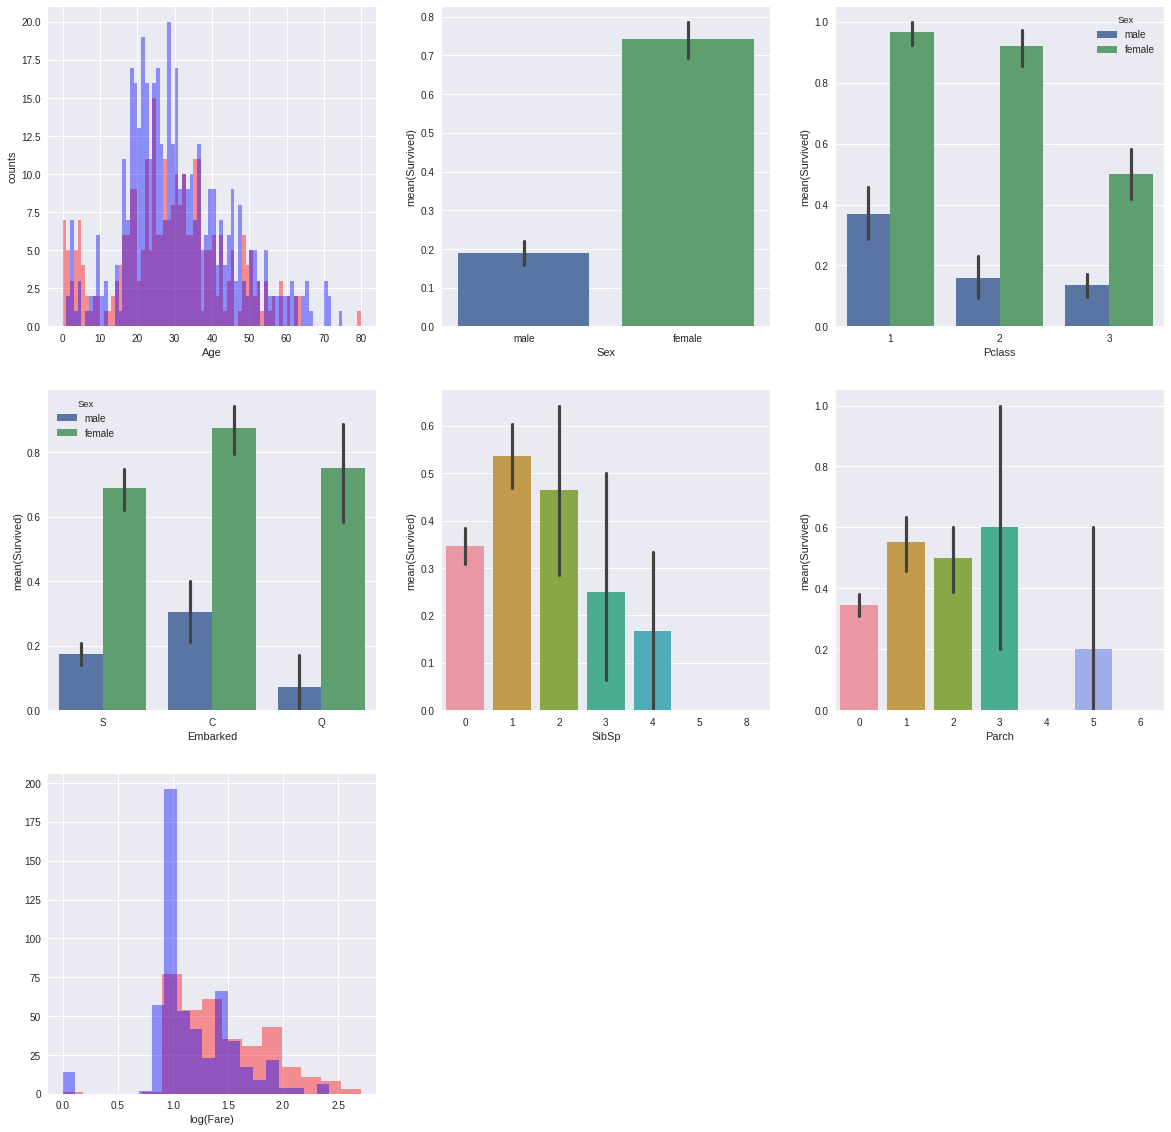

In [100]:
#data visualization 
plt.figure(figsize=[20,20])
plt.subplot(331)
sns.distplot(survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(non_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,axlabel='Age')
plt.xlabel('Age')
plt.ylabel('counts')
plt.subplot(332)
sns.barplot(x='Sex',y='Survived',data=train)
plt.subplot(333)
sns.barplot(x='Pclass',y='Survived',data=train,hue='Sex')
plt.subplot(334)
sns.barplot(x='Embarked',y='Survived',data=train,hue='Sex')
plt.subplot(335)
sns.barplot(x='SibSp' , y='Survived',data=train)
plt.subplot(336)
sns.barplot(x='Parch',y='Survived',data=train)
plt.subplot(337)
sns.distplot(np.log10(survived['Fare'].dropna().values+1), kde=False, color=surv_col,axlabel='log(Fare)')
sns.distplot(np.log10(non_survived['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='log(Fare)')
plt.show()